# Proyek Analisis Data: Bike-Sharing-dataset
- **Nama:** Alfarelzi
- **Email:** alfarezi31as@gmail.com
- **ID Dicoding:** Farelzi

## Menentukan Pertanyaan Bisnis


- Bagaimana kondisi cuaca mempengaruhi jumlah peminjaman sepeda harian?

- Kapan puncak peminjaman sepeda terjadi?
Bagaimana pola peminjaman sepeda berubah berdasarkan jam, hari, atau bulan?


## Tentang Data

### Dataset ini berisi informasi tentang:

- **instant**: indeks baris
- **dteday**: tanggal
- **season**: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- **yr**: tahun (0: 2011, 1:2012)
- **mnth**: bulan (1 sampai 12)
- **hr**: jam (0 sampai 23)
- **holiday**: apakah hari itu libur atau tidak
- **weekday**: hari
- **workingday**: 1 jika bukan akhir pekan atau hari libur, 0 jika sebaliknya
- **weathersit**: kondisi cuaca
- **temp**: temperatur ternormalisasi (Celcius)
- **atemp**: suhu yang dirasakan, ternormalisasi (Celcius)
- **hum**: kelembapan ternormalisasi
- **windspeed**: kecepatan angin ternormalisasi
- **casual**: jumlah pengguna tidak terdaftar
- **registered**: jumlah pengguna terdaftar
- **cnt**: jumlah total sepeda yang disewa (termasuk terdaftar dan tidak)

## Import Semua Packages/Library yang Digunakan

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [69]:
df_day=pd.read_csv("Bike-Sharing-dataset/day.csv") # Memanggil day.csv dengan variabel df_day
df_hour=pd.read_csv("Bike-Sharing-dataset/hour.csv") # Memanggil day.csv dengan variabel df_day


In [70]:
df_day.head() #Menampilkan 5 baris teratas data day.csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
df_hour.head() #Menampilkan 5 baris teratas data hour.csv

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [72]:
def check_data(df):
    print("Info:")
    print(df.info())
    print("\nJumlah nilai yang hilang di setiap kolom:")
    print(df.isna().sum())
    print("\nJumlah data duplikat:")
    print(df.duplicated().sum())
    print("\nBentuk data:")
    print(df.shape)
    print("\nTipe data setiap kolom:")
    print(df.dtypes)

check_data(df_day) #Check data day.csv


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah nilai yang hilang di setiap kolom:
instant       0
dteday        0
season 

In [73]:
check_data(df_hour) #Check data hour.csv

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Jumlah nilai yang hilang di setiap ko

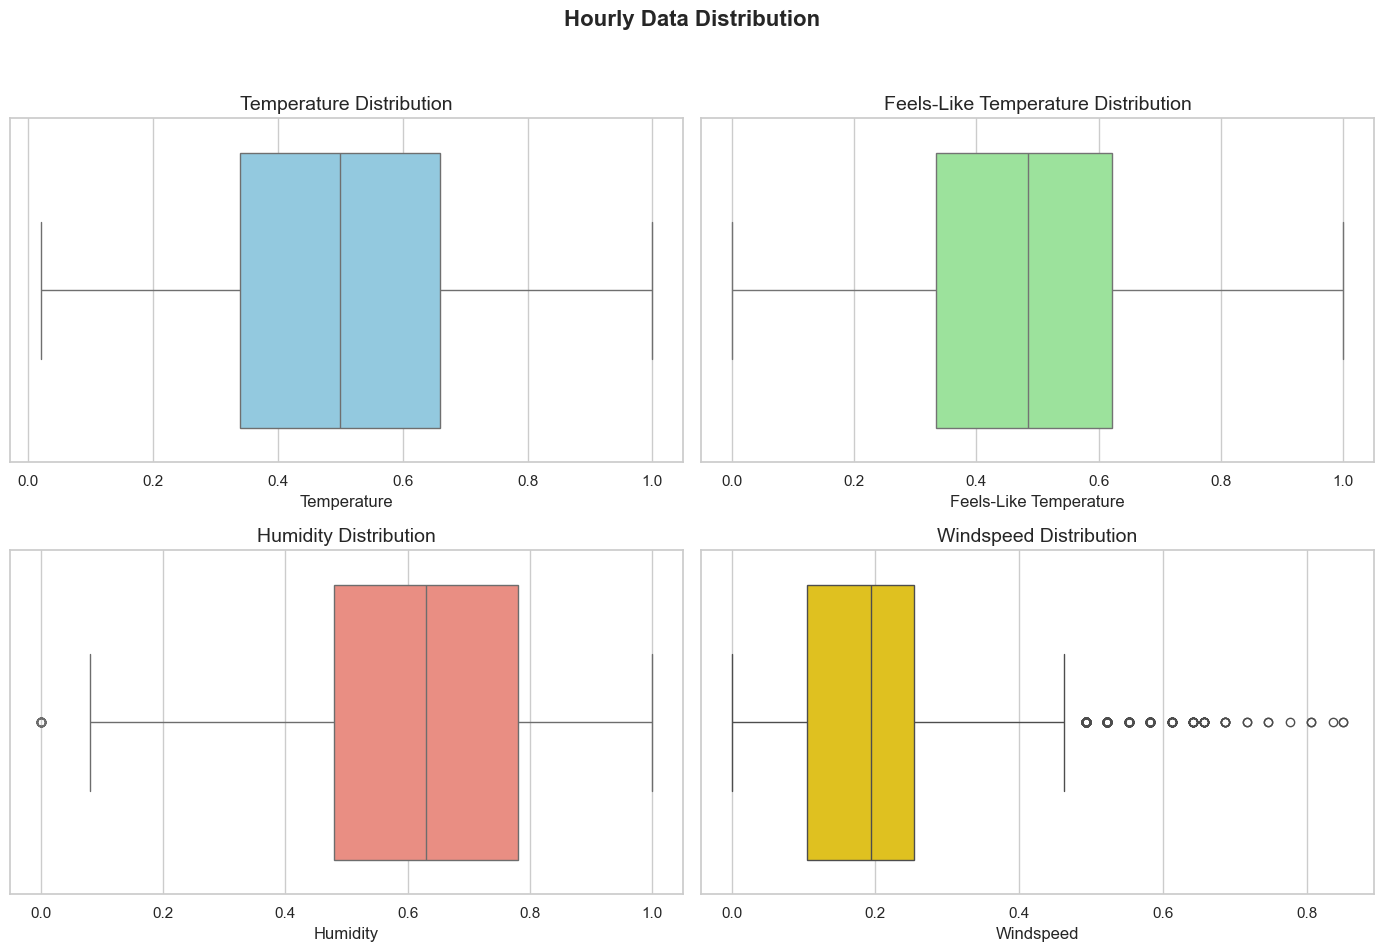

In [74]:


sns.set(style="whitegrid")

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hourly Data Distribution', fontsize=16, fontweight='bold')

# Temperature Distribution
sns.boxplot(ax=axes[0, 0], x=df_hour['temp'], color='skyblue')
axes[0, 0].set_title('Temperature Distribution', fontsize=14)
axes[0, 0].set_xlabel('Temperature', fontsize=12)

# Feels-Like Temperature Distribution
sns.boxplot(ax=axes[0, 1], x=df_hour['atemp'], color='lightgreen')
axes[0, 1].set_title('Feels-Like Temperature Distribution', fontsize=14)
axes[0, 1].set_xlabel('Feels-Like Temperature', fontsize=12)

# Humidity Distribution
sns.boxplot(ax=axes[1, 0], x=df_hour['hum'], color='salmon')
axes[1, 0].set_title('Humidity Distribution', fontsize=14)
axes[1, 0].set_xlabel('Humidity', fontsize=12)

# Windspeed Distribution
sns.boxplot(ax=axes[1, 1], x=df_hour['windspeed'], color='gold')
axes[1, 1].set_title('Windspeed Distribution', fontsize=14)
axes[1, 1].set_xlabel('Windspeed', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




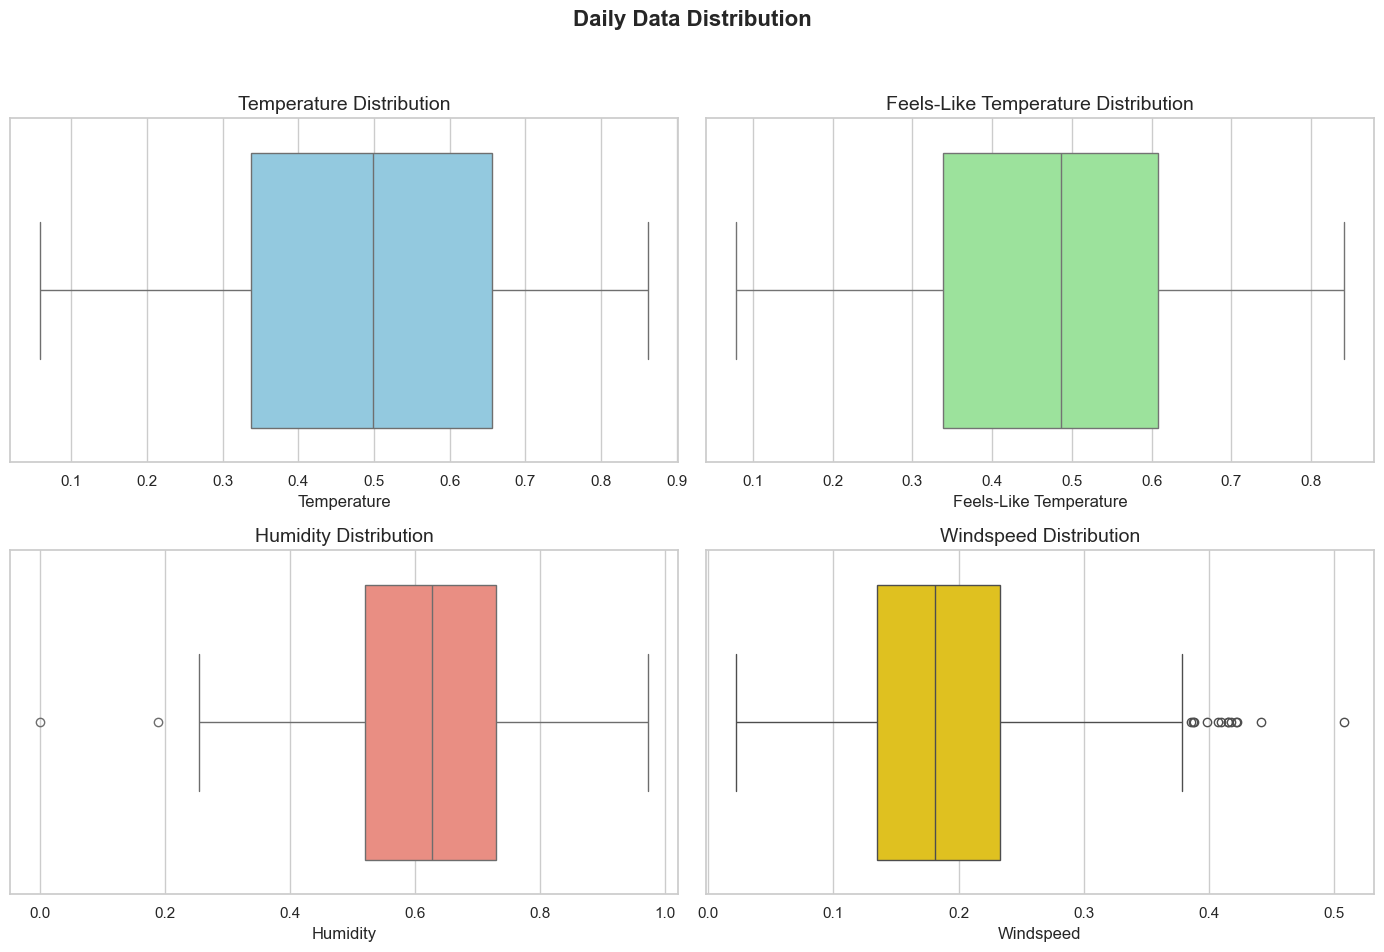

In [75]:
# Membuat ulang visualisasi untuk dataset daily dengan penyesuaian yang sama

# Membuat figure dan axes dengan ukuran yang ditentukan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Daily Data Distribution', fontsize=16, fontweight='bold')

# Temperature Distribution
sns.boxplot(ax=axes[0, 0], x=df_day['temp'], color='skyblue')
axes[0, 0].set_title('Temperature Distribution', fontsize=14)
axes[0, 0].set_xlabel('Temperature', fontsize=12)

# Feels-Like Temperature Distribution
sns.boxplot(ax=axes[0, 1], x=df_day['atemp'], color='lightgreen')
axes[0, 1].set_title('Feels-Like Temperature Distribution', fontsize=14)
axes[0, 1].set_xlabel('Feels-Like Temperature', fontsize=12)

# Humidity Distribution
sns.boxplot(ax=axes[1, 0], x=df_day['hum'], color='salmon')
axes[1, 0].set_title('Humidity Distribution', fontsize=14)
axes[1, 0].set_xlabel('Humidity', fontsize=12)

# Windspeed Distribution
sns.boxplot(ax=axes[1, 1], x=df_day['windspeed'], color='gold')
axes[1, 1].set_title('Windspeed Distribution', fontsize=14)
axes[1, 1].set_xlabel('Windspeed', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Cleaning Data

In [76]:

# Mengubah kolom 'instant' sebagai index
df_hour.set_index('instant', inplace=True)
df_day.set_index('instant', inplace=True)

#Mengubah tipe data kolom dteday menjadi datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])


## Exploratory Data Analysis (EDA)

### Explore ...

In [88]:
df_day.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [89]:
df_hour.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_log,registered_log,cnt_log
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2.706618,4.378018,4.574739
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.693147
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,1.609438,3.555348,3.713572
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2.890372,4.753590,4.962845
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,3.891820,5.398163,5.641907
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,5.908083,6.787845,6.885510
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1.490040,1.398230,1.417869


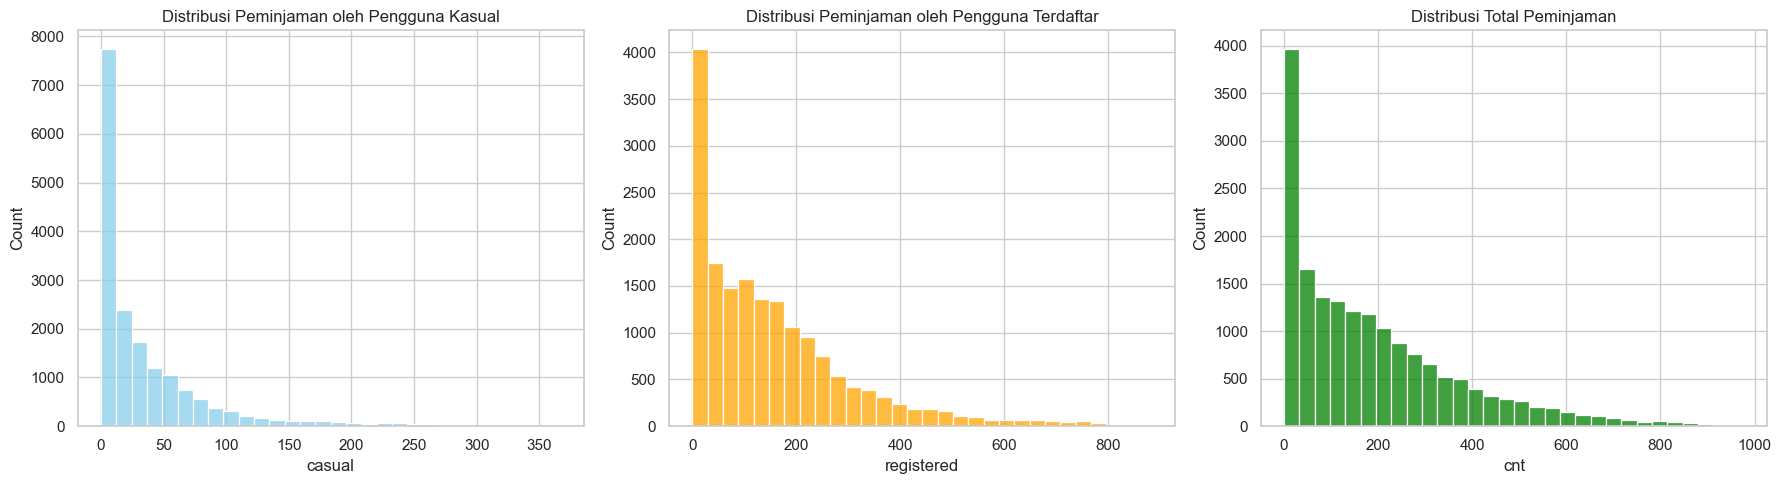

In [77]:
# Visualisasi distribusi untuk kolom 'casual', 'registered', dan 'cnt' menggunakan histogram
plt.figure(figsize=(18, 5))

# Histogram untuk 'casual'
plt.subplot(1, 3, 1)
sns.histplot(df_hour['casual'], bins=30, kde=False, color='skyblue')
plt.title('Distribusi Peminjaman oleh Pengguna Kasual')

# Histogram untuk 'registered'
plt.subplot(1, 3, 2)
sns.histplot(df_hour['registered'], bins=30, kde=False, color='orange')
plt.title('Distribusi Peminjaman oleh Pengguna Terdaftar')

# Histogram untuk 'cnt'
plt.subplot(1, 3, 3)
sns.histplot(df_hour['cnt'], bins=30, kde=False, color='green')
plt.title('Distribusi Total Peminjaman')

plt.tight_layout()
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah peminjaman sepeda harian?


#### Suhu vs Jumlah Peminjaman Sepeda Harian:

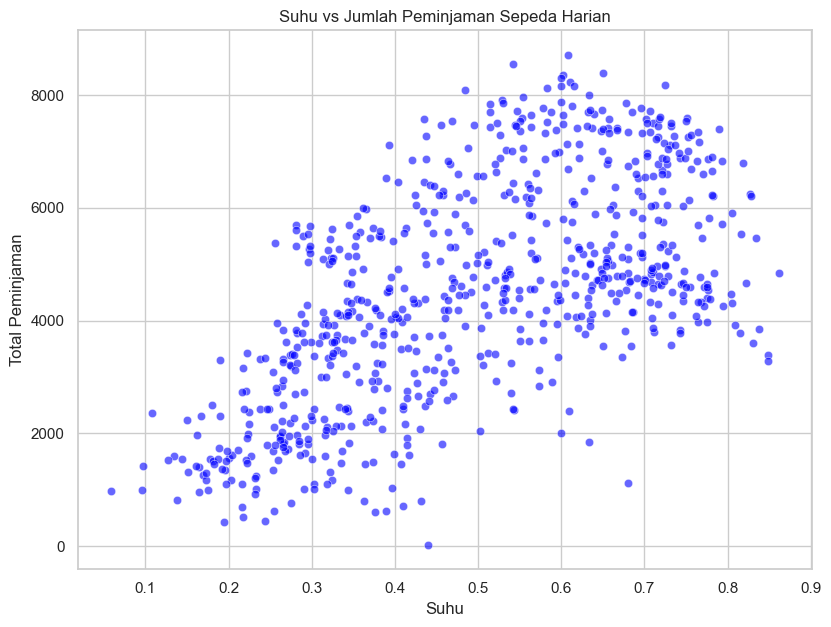

In [79]:

# Suhu (temp) vs Jumlah Peminjaman
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=df_day, color='blue', alpha=0.6)
plt.title('Suhu vs Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Suhu')
plt.ylabel('Total Peminjaman')
plt.tight_layout()
plt.show()



Terdapat korelasi positif antara suhu dan jumlah peminjaman sepeda.
Ini menunjukkan bahwa jumlah peminjaman cenderung meningkat pada hari yang lebih hangat. Scatter plot menunjukkan tren positif, di mana hari dengan suhu lebih tinggi memiliki jumlah peminjaman yang lebih besar.

#### Kelembapan vs Jumlah Peminjaman Sepeda Harian:

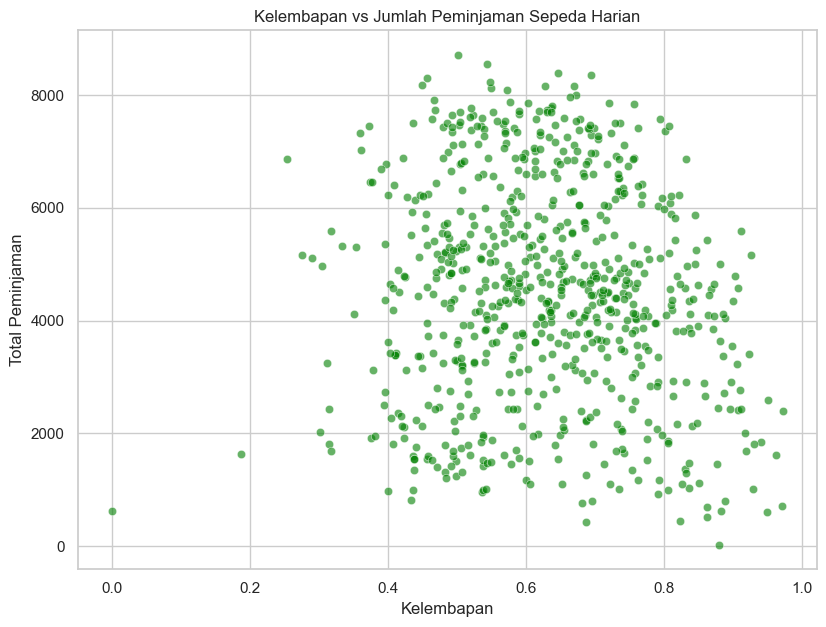

In [80]:
# Kelembapan (hum) vs Jumlah Peminjaman
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 2)
sns.scatterplot(x='hum', y='cnt', data=df_day, color='green', alpha=0.6)
plt.title('Kelembapan vs Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Kelembapan')
plt.ylabel('Total Peminjaman')
plt.tight_layout()
plt.show()



Scatter plot antara kelembapan dan jumlah peminjaman tidak menunjukkan hubungan yang jelas, namun ada kecenderungan jumlah peminjaman yang lebih rendah pada kelembapan yang sangat tinggi, yang mungkin mengindikasikan pengurangan aktivitas peminjaman sepeda pada kondisi yang sangat lembap.

#### Kecepatan Angin vs Jumlah Peminjaman Sepeda Harian:

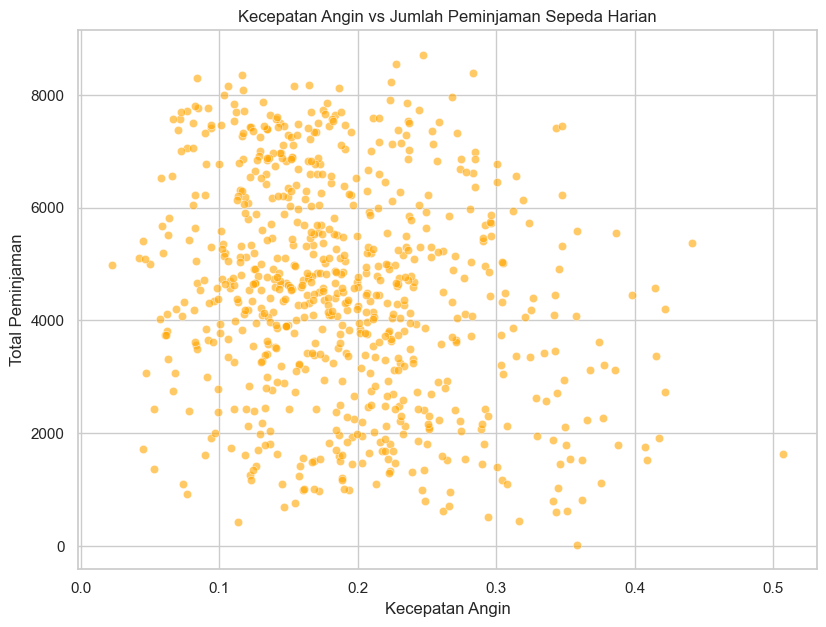

In [81]:
# Kecepatan Angin (windspeed) vs Jumlah Peminjaman
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 3)
sns.scatterplot(x='windspeed', y='cnt', data=df_day, color='orange', alpha=0.6)
plt.title('Kecepatan Angin vs Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Total Peminjaman')
plt.tight_layout()
plt.show()

Tidak ada hubungan yang jelas dari scatter plot antara kecepatan angin dan jumlah peminjaman, tapi terlihat bahwa pada kecepatan angin yang lebih tinggi, jumlah peminjaman cenderung lebih bervariasi namun umumnya lebih rendah.

#### Situasi Cuaca vs Jumlah Peminjaman Sepeda Harian:

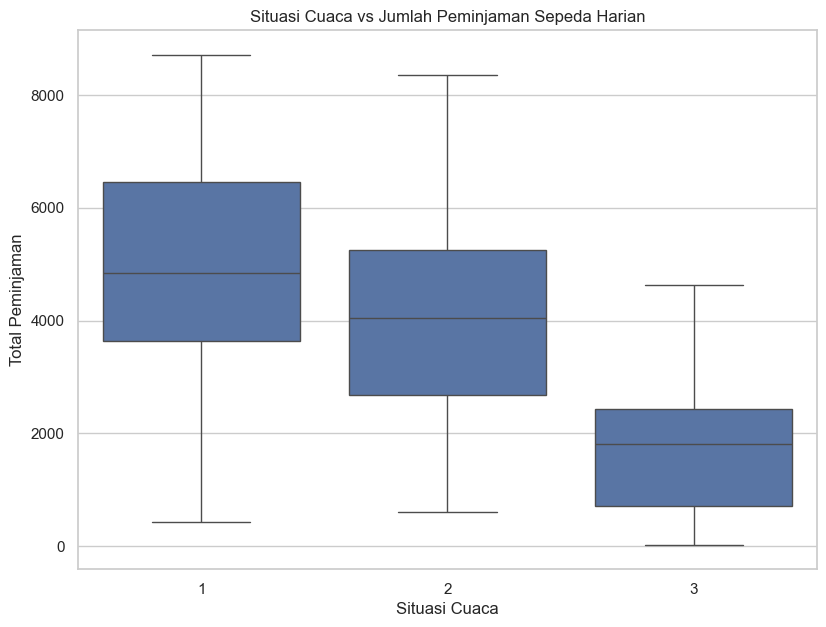

In [82]:
# Situasi Cuaca (weathersit) vs Jumlah Peminjaman
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Situasi Cuaca vs Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Total Peminjaman')
plt.tight_layout()
plt.show()


Boxplot menunjukkan bahwa kondisi cuaca yang lebih baik (nilai weathersit lebih rendah) berkorelasi dengan jumlah peminjaman sepeda yang lebih tinggi. Ini menunjukkan bahwa cuaca yang lebih cerah atau lebih baik cenderung mendorong lebih banyak peminjaman sepeda.

### Pertanyaan 2: 
- Kapan puncak peminjaman sepeda terjadi?
- Bagaimana pola peminjaman sepeda berubah berdasarkan jam, hari, atau bulan?

In [83]:
# Mempersiapkan data agregat
hourly_avg = df_hour.groupby('hr')['cnt'].mean()
daily_avg = df_hour.groupby('weekday')['cnt'].mean()
monthly_avg = df_hour.groupby('mnth')['cnt'].mean()

#### Pola Peminjaman Berdasarkan Jam (Hourly Patterns)

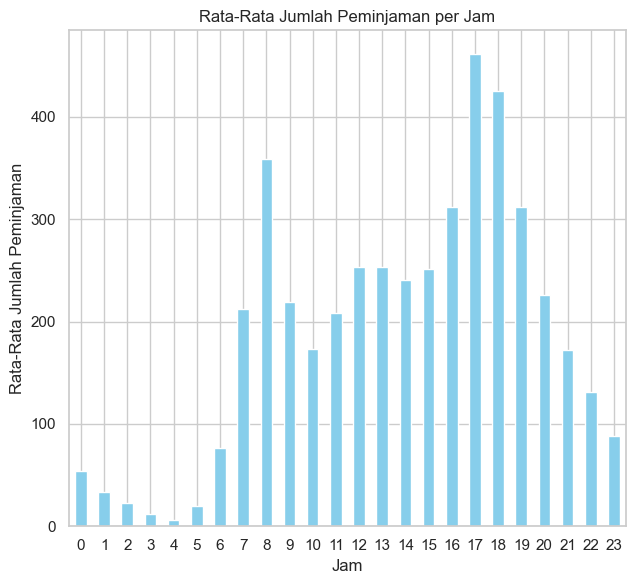

In [84]:
# Pola Peminjaman Berdasarkan Jam
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Rata-Rata Jumlah Peminjaman per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Puncak Peminjaman: Puncak peminjaman terjadi pada jam-jam sibuk: pagi sekitar jam 8 dan sore sekitar jam 17-18. Ini kemungkinan besar mencerminkan pola komuter, di mana orang menggunakan sepeda untuk pergi ke dan pulang dari tempat kerja atau sekolah. Konsistensi puncak ini menunjukkan bahwa layanan berbagi sepeda sangat dipengaruhi oleh rutinitas harian pengguna. Penyedia layanan dapat meningkatkan ketersediaan sepeda dan stasiun docking di jam-jam sibuk untuk memenuhi permintaan.


#### Pola Peminjaman Berdasarkan Hari (Daily Patterns)

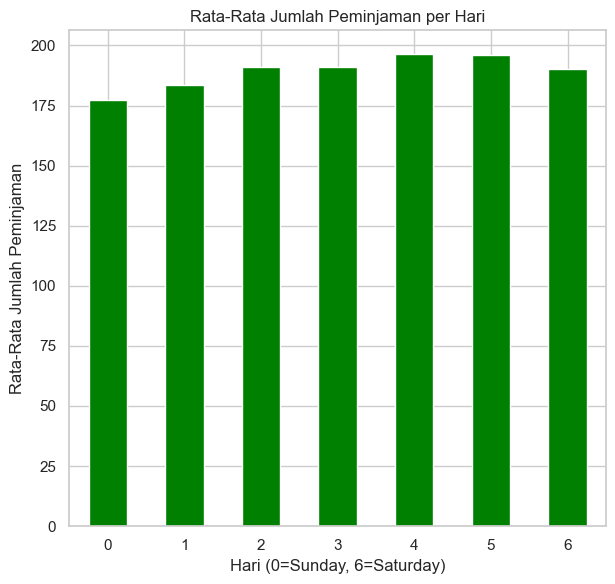

In [85]:
# Pola Peminjaman Berdasarkan Hari
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
daily_avg.plot(kind='bar', color='green')
plt.title('Rata-Rata Jumlah Peminjaman per Hari')
plt.xlabel('Hari (0=Sunday, 6=Saturday)')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Varian Mingguan: Ada fluktuasi dalam jumlah peminjaman dari hari ke hari, dengan hari kerja menunjukkan jumlah peminjaman yang lebih tinggi dibandingkan akhir pekan. Pola ini menunjukkan bahwa sepeda banyak digunakan untuk komute selama hari kerja. Pada akhir pekan, penurunan peminjaman mungkin menunjukkan penggunaan yang lebih santai atau rekreasi, yang kurang rutin atau bisa dipengaruhi oleh faktor cuaca atau kegiatan sosial.

#### Pola Peminjaman Berdasarkan Bulan (Monthly Patterns)

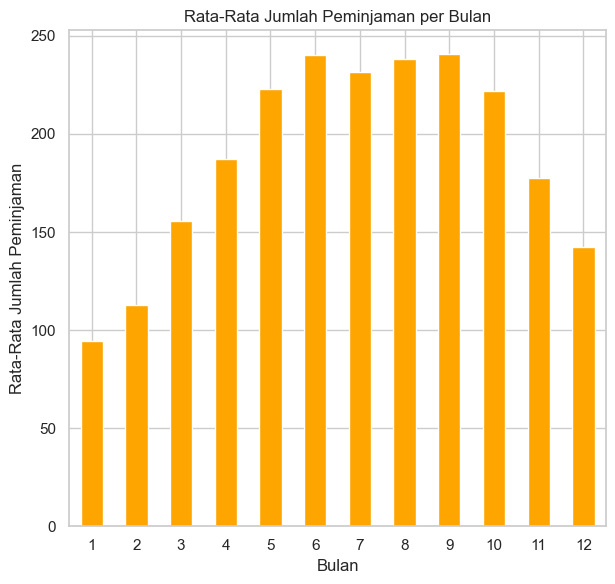

In [86]:
# Pola Peminjaman Berdasarkan Bulan
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
monthly_avg.plot(kind='bar', color='orange')
plt.title('Rata-Rata Jumlah Peminjaman per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Tren Bulanan: Jumlah peminjaman cenderung meningkat dari bulan Januari hingga Juni, mencapai puncaknya di bulan-bulan musim panas, kemudian menurun kembali ke arah musim dingin. Kenaikan jumlah peminjaman selama bulan-bulan hangat mungkin disebabkan oleh kondisi cuaca yang lebih menyenangkan, yang mendukung aktivitas luar ruang seperti bersepeda. Penurunan di bulan-bulan dingin mungkin karena kondisi cuaca yang kurang mendukung, seperti hujan atau salju, yang membuat bersepeda menjadi kurang menarik atau bahkan tidak mungkin dilakukan.

## Conclusion

### Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda Harian

Analisis visualisasi menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda harian. Berikut adalah beberapa temuan utama:

1. Suhu:
- Terdapat tren positif yang kuat antara suhu dan jumlah peminjaman.
- Hari yang lebih hangat cenderung memiliki jumlah peminjaman yang lebih tinggi.
- Suhu yang terlalu tinggi mungkin membatasi peningkatan ini.

2. Kelembapan:
- Tidak ada pola yang sangat jelas antara kelembapan dan jumlah peminjaman.
- Kelembapan yang sangat tinggi bisa menurunkan jumlah peminjaman.

3. Kecepatan Angin:
- Hubungan antara kecepatan angin dan jumlah peminjaman tidak terlalu jelas.
- Angin yang lebih kencang cenderung menurunkan jumlah peminjaman.

4. Situasi Cuaca:
- Cuaca yang lebih cerah atau lebih baik berkorelasi dengan jumlah peminjaman yang lebih tinggi.
- Cuaca yang lebih buruk, seperti hujan ringan atau badai, berkorelasi dengan penurunan jumlah peminjaman.

**Kesimpulan:**

Kondisi cuaca yang baik secara intuitif lebih mendukung kegiatan bersepeda. Hujan, salju, atau cuaca buruk lainnya tidak hanya membuat bersepeda menjadi tidak nyaman tetapi juga bisa meningkatkan risiko kecelakaan.
Informasi ini dapat digunakan oleh penyedia layanan berbagi sepeda untuk mengantisipasi fluktuasi harian dalam permintaan sepeda dan menyesuaikan ketersediaan mereka sesuai. Hal ini dapat membantu meningkatkan kepuasan pengguna dan efisiensi operasional.

### Kapan puncak peminjaman sepeda terjadi?


- Analisis data dan visualisasi menunjukkan bahwa peminjaman sepeda mencapai puncaknya dua kali dalam sehari: sekitar jam 8 pagi dan antara jam 5 sore hingga 6 sore. Pola ini konsisten dengan rutinitas harian banyak orang, di mana sepeda digunakan untuk perjalanan ke tempat kerja atau pendidikan di pagi hari dan kembali ke rumah di sore hari.

- Konsistensi puncak peminjaman di jam-jam tertentu menunjukkan bahwa banyak pengguna memanfaatkan sistem berbagi sepeda untuk kebutuhan komuter sehari-hari. Penyedia layanan dapat meningkatkan ketersediaan sepeda di stasiun-stasiun penting pada jam-jam ini untuk memenuhi permintaan yang meningkat. Hal ini dapat membantu memastikan akses yang memadai bagi pengguna, meningkatkan kepuasan pengguna, dan mendorong penggunaan berkelanjutan dari layanan ini.

- Puncak peminjaman mencerminkan pola komuter yang umum di kota-kota besar, di mana sepeda berbagi digunakan sebagai alat transportasi yang efisien, ramah lingkungan, dan sehat. Memahami pola ini penting bagi operator sistem berbagi sepeda untuk mengoptimalkan layanan mereka dan memastikan akses yang baik bagi pengguna ketika mereka paling membutuhkannya.

### dan Bagaimana pola peminjaman sepeda berubah berdasarkan jam, hari, atau bulan?

- Berdasarkan analisis data yang telah dilakukan, kita dapat menyimpulkan bahwa pola peminjaman sepeda sangat dipengaruhi oleh waktu dalam sehari, hari dalam seminggu, dan bulan dalam setahun. Secara spesifik, peminjaman sepeda menunjukkan dua puncak yang signifikan setiap hari, yang terjadi pada jam 8 pagi dan antara jam 17-18 (5-6 sore), konsisten dengan jam perjalanan ke dan dari tempat kerja atau sekolah. Pola ini menunjukkan penggunaan sepeda yang intensif sebagai moda transportasi untuk keperluan komuter selama hari kerja.

- Selama seminggu, terdapat variasi dalam jumlah peminjaman, dengan hari kerja menampilkan aktivitas yang lebih tinggi dibandingkan dengan akhir pekan. Ini mencerminkan kecenderungan penggunaan sepeda untuk komuter sehari-hari dan kegiatan rutin lainnya, berbeda dengan akhir pekan yang mungkin lebih didominasi oleh penggunaan sepeda untuk rekreasi atau aktivitas santai.

- Sementara itu, tren bulanan mengungkapkan bahwa peminjaman sepeda cenderung meningkat dari musim semi hingga musim panas dan menurun menuju musim gugur dan musim dingin. Fluktuasi ini mencerminkan pengaruh kondisi cuaca terhadap kebiasaan bersepeda, dengan bulan-bulan yang lebih hangat mendukung peningkatan penggunaan sepeda. Keseluruhan pola ini memberikan wawasan penting bagi penyedia layanan berbagi sepeda untuk mengoptimalkan operasi mereka, memastikan bahwa sepeda tersedia sesuai dengan permintaan yang bervariasi berdasarkan jam, hari, dan bulan, memungkinkan mereka untuk melayani pengguna mereka dengan lebih efektif.